In [15]:
from scipy import stats

In [16]:
from gradients import *

In [17]:
surf_labels, mask_removed = load_atlas()

from brainspace.datasets import load_conte69

surf_lh, surf_rh = load_conte69()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


# pairwise

In [18]:
d1 = pd.read_csv('rois_pairwise_stats.csv')

In [5]:
d1

indic  roi             pair     tstat    pvalue  signif
0        ecc    0  baseline__early -0.444305  0.658053       0
1        ecc    0   baseline__late -0.947098  0.346514       0
2        ecc    0      early__late -0.440811  0.660569       0
3        ecc    1  baseline__early -1.124894  0.264084       0
4        ecc    1   baseline__late -0.886355  0.378151       0
...      ...  ...              ...       ...       ...     ...
14965  grad4  996   baseline__late -2.472372  0.015599       1
14966  grad4  996      early__late -0.467313  0.641579       0
14967  grad4  997  baseline__early -0.038605  0.969304       0
14968  grad4  997   baseline__late -0.546235  0.586463       0
14969  grad4  997      early__late -0.573499  0.567957       0

[14970 rows x 6 columns]

In [6]:
statistics = ['tstat']
indicators = ['ecc',
#  'grad1'
 ]
data_range = {
    'fstat': (0, 10),
    'tstat': (-3, 3)
}
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'tstat': 'bwr',
    'pvalue': 'gist_gray',
}

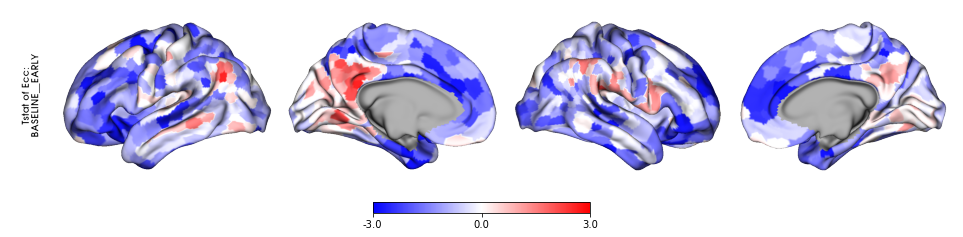

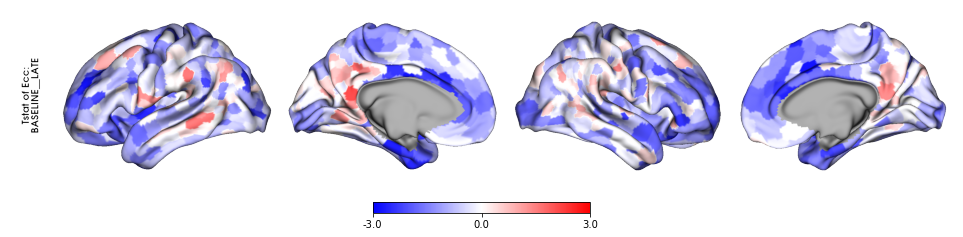

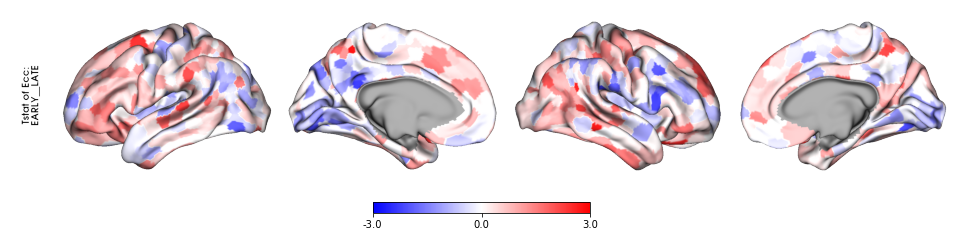

In [7]:
for c in indicators:
    for pair in d1['pair'].unique():
        d = d1[(d1['indic'] == c)&(d1['pair'] == pair)]
        for s in statistics:
            data = np.array(d[s])
            data = map_to_labels(data, surf_labels, mask=mask_removed)
            stack_surfplot(data, s.capitalize() + ' of ' + c.capitalize() + ':\n' + pair.upper(),
            cmap[s], data_range[s])

# anova

In [19]:
d2 = pd.read_csv('rois_anova_stats.csv')

In [9]:
d2

indic  roi     fstat    pvalue  signif
0       ecc    0  0.408893  0.665331       0
1       ecc    1  0.747181  0.475947       0
2       ecc    2  0.519728  0.596048       0
3       ecc    3  0.059077  0.942663       0
4       ecc    4  0.173517  0.840919       0
...     ...  ...       ...       ...     ...
4985  grad4  993  2.180296  0.117579       0
4986  grad4  994  0.119942  0.887081       0
4987  grad4  995  2.071467  0.130597       0
4988  grad4  996  3.372169  0.037683       1
4989  grad4  997  0.200657  0.818474       0

[4990 rows x 5 columns]

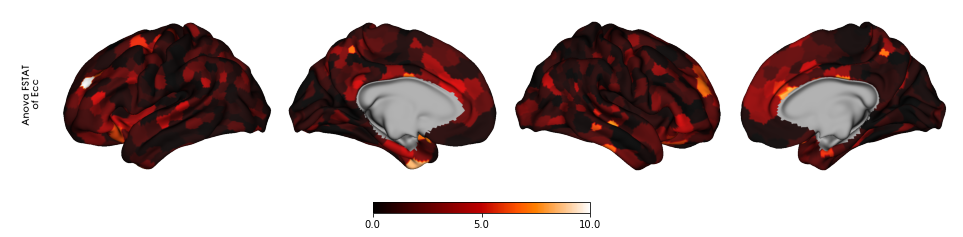

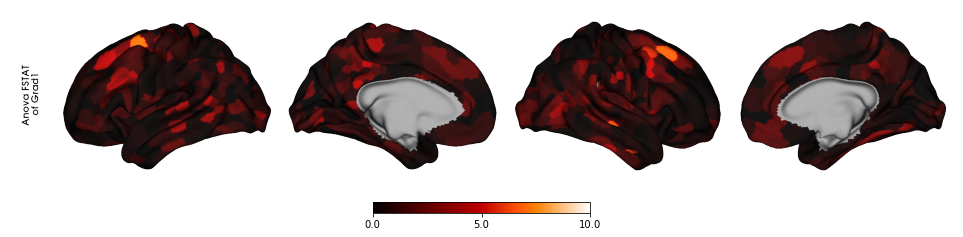

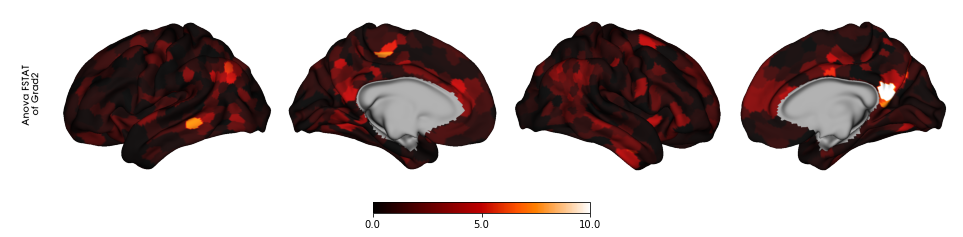

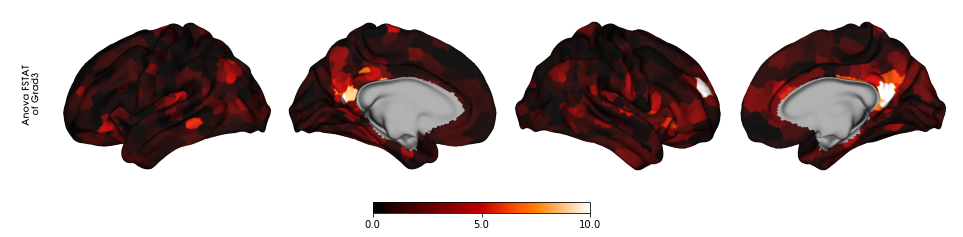

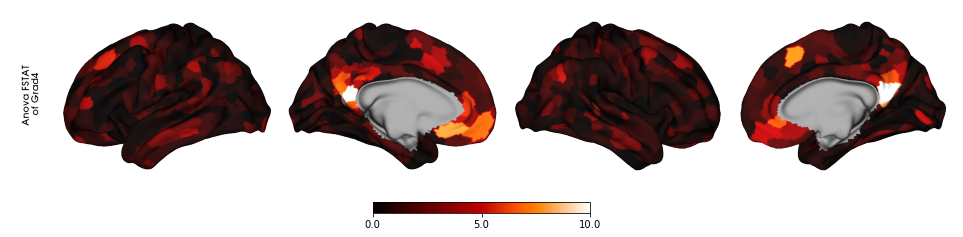

In [10]:
statistics = ['fstat']
indicators = d2.indic.unique()
cmap = {'signif': 'gist_gray',
    'fstat': 'gist_heat',
    'pvalue': 'gist_gray'
}
data_range = {
    'fstat': (0, 10)
}

for c in indicators:
    d = d2[d2['indic'] == c]
    for s in statistics:
        data = np.array(d[s])
        data = map_to_labels(data, surf_labels, mask=mask_removed)
        stack_surfplot(data, 'Anova ' + s.upper() + '\n of ' + c.capitalize(), cmap[s], data_range[s])

# pingouin

In [20]:
import pingouin as pg

In [21]:
df = pd.read_csv('subjects_gradients_ecc.csv')

In [101]:
d = df.groupby(['indic', 'roi']).apply(pg.rm_anova, dv='value', within='epic', subject='subj')

In [26]:
ALPHA = 0.05

In [27]:
d[d['p-unc'] < ALPHA].reset_index().groupby('indic').size()

indic
ecc      239
grad1    163
grad2    158
grad3    225
grad4    151
dtype: int64

In [94]:
d.loc[indic]

Source  ddof1  ddof2         F     p-unc       np2       eps  p-GG-corr  \
roi                                                                             
0   0   epic      2     78  0.412618  0.663351  0.010469  0.977595        NaN   
1   0   epic      2     78  0.877221  0.420000  0.021998  0.897917        NaN   
2   0   epic      2     78  0.666878  0.516210  0.016812  0.992531        NaN   
3   0   epic      2     78  0.076593  0.926336  0.001960  0.963704        NaN   
4   0   epic      2     78  0.170718  0.843373  0.004358  0.956310        NaN   
...      ...    ...    ...       ...       ...       ...       ...        ...   
993 0   epic      2     78  1.047317  0.355759  0.026152  0.937423        NaN   
994 0   epic      2     78  1.984302  0.144356  0.048416  0.942446        NaN   
995 0   epic      2     78  0.022711  0.977552  0.000582  0.971218        NaN   
996 0   epic      2     78  0.662621  0.518376  0.016706  0.875950        NaN   
997 0   epic      2     78  1.260748  0.289153  0.031315  0.979001        NaN   

      sphericity  W-spher  p-spher  
roi                                 
0   0        NaN      NaN      NaN  
1   0        NaN      NaN      NaN  
2   0        NaN      NaN      NaN  
3   0        NaN      NaN      NaN  
4   0        NaN      NaN      NaN  
...          ...      ...      ...  
993 0        NaN      NaN      NaN  
994 0        NaN      NaN      NaN  
995 0        NaN      NaN      NaN  
996 0        NaN      NaN      NaN  
997 0        NaN      NaN      NaN  

[998 rows x 11 columns]

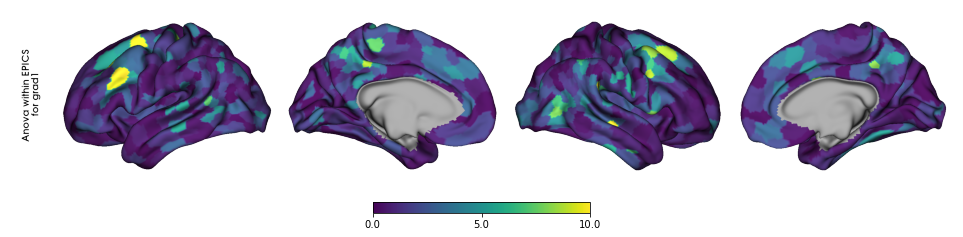

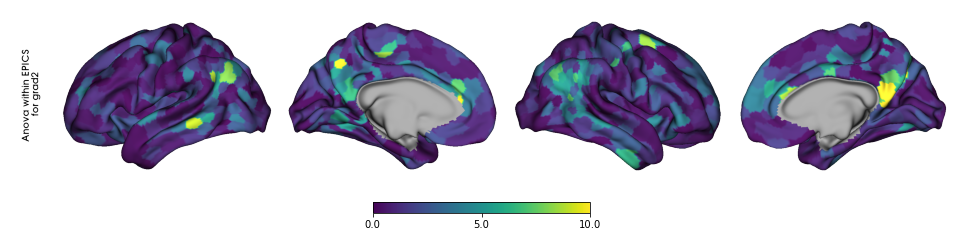

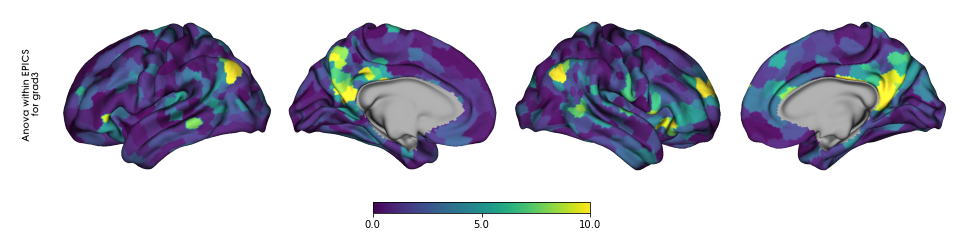

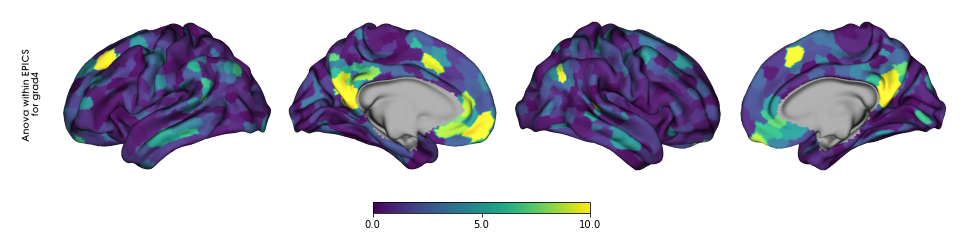

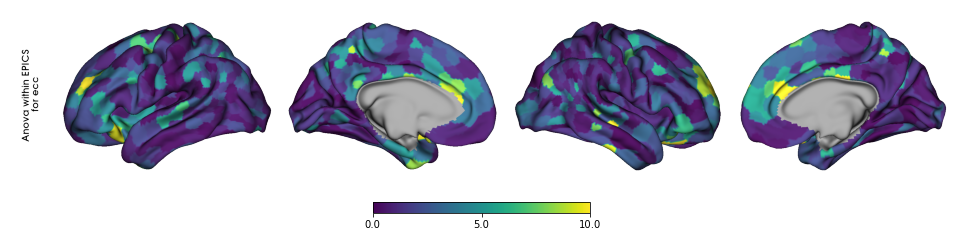

In [95]:
# Anova's F value
data_range = (0, 10)

for indic in df.indic.unique():
    data = d.loc[indic]['F']
    data = np.array(data)
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', data_range)

In [22]:
#todo FDR false discovery rate correction to make the ALPHA

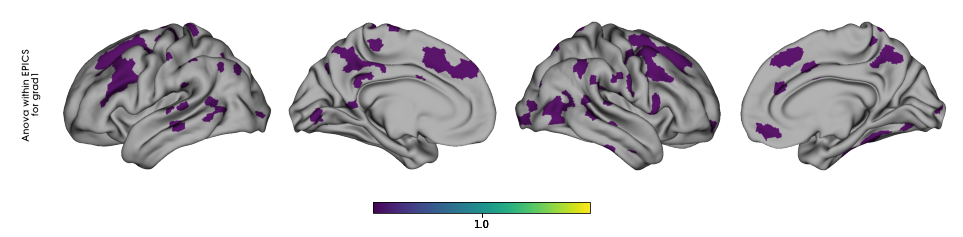

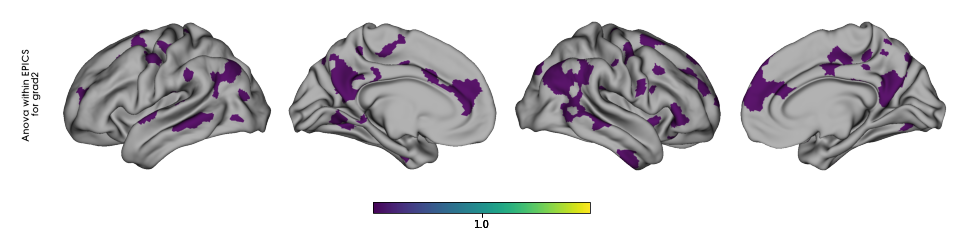

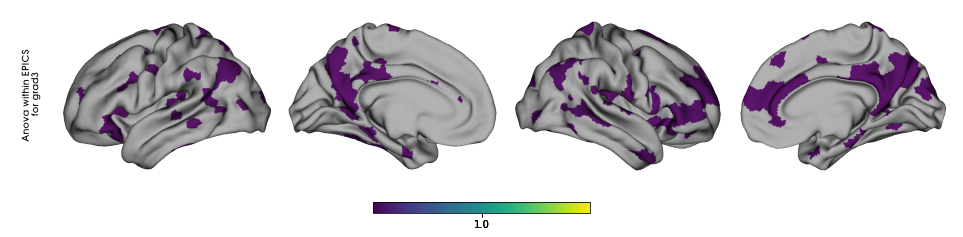

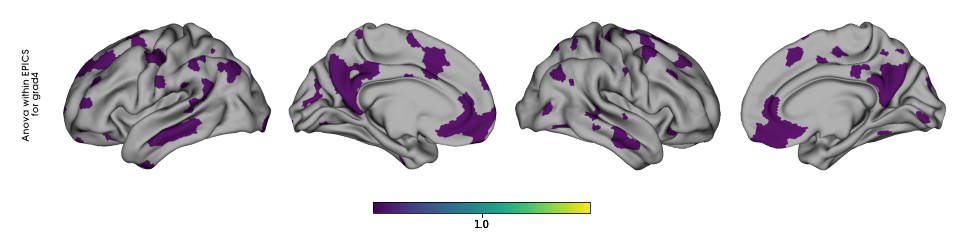

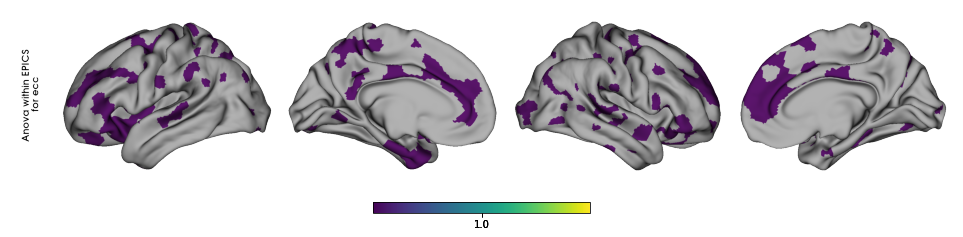

In [ ]:
# significance

for indic in df.indic.unique():
    data = d.loc[indic]
    data = data[data['p-unc'] < ALPHA]
    data = np.array(data)
    data = np.array(d.loc[indic]['p-unc']) < ALPHA
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', None)

# false discovery rate

In [60]:
# Bonferroni correction ('bonf') in which the p-values are multiplied by the number of comparisons.
# Less conservative methods are also included such as Sidak (1967) ('sidak'),
# Holm (1979) ('holm'), Benjamini & Hochberg (1995) ('fdr_bh'),
# and Benjamini & Yekutieli (2001) ('fdr_by')

FDR_METHOD = 'bonf'

number of fdr-corrected ROIs for  grad1  is  1
number of fdr-corrected ROIs for  grad2  is  2
number of fdr-corrected ROIs for  grad3  is  14
number of fdr-corrected ROIs for  grad4  is  10
number of fdr-corrected ROIs for  ecc  is  6


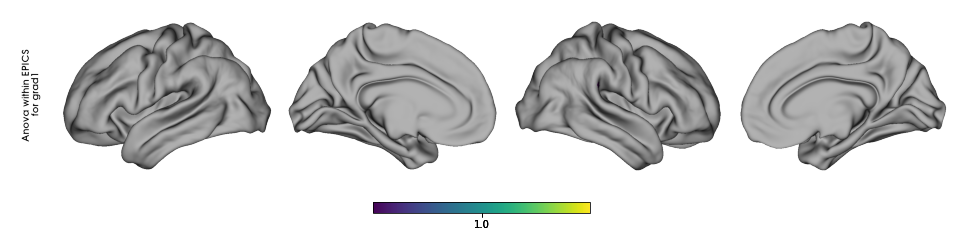

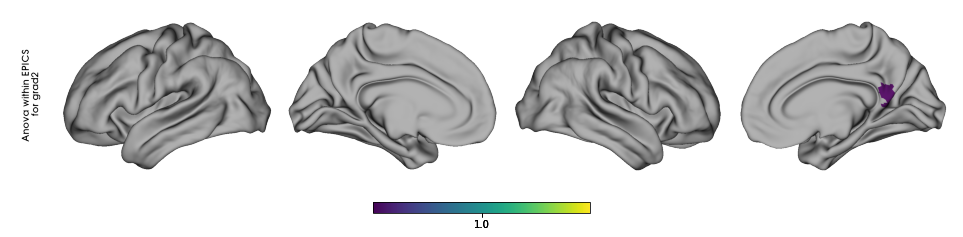

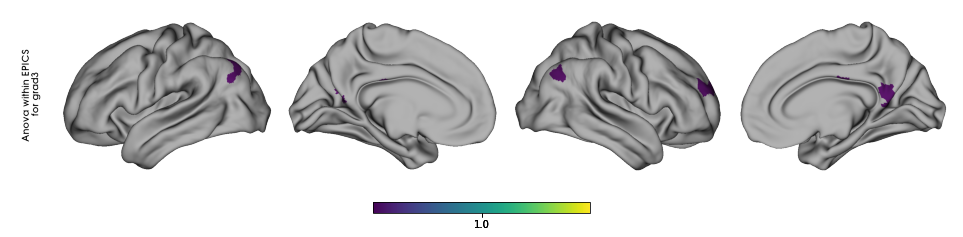

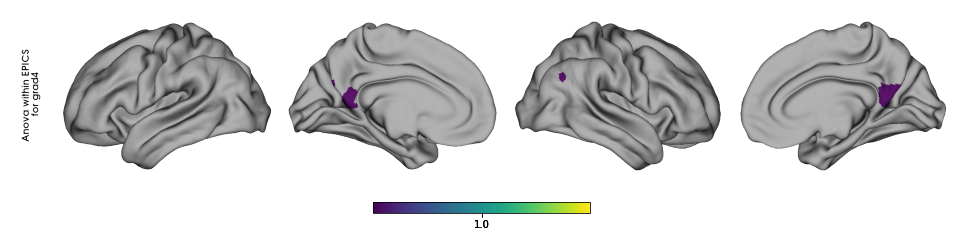

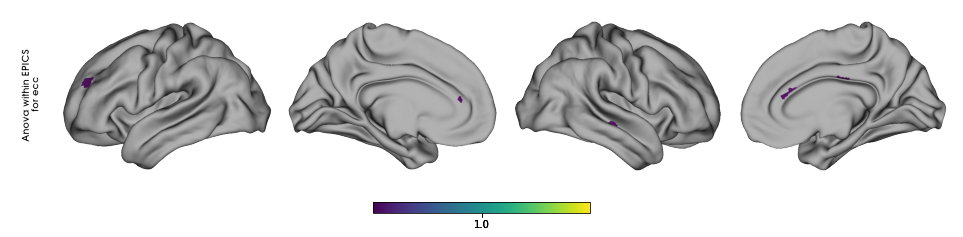

In [61]:
for indic in df.indic.unique():
    data = d.loc[indic]

    pvals = data['p-unc'].tolist()
    signif, pvals_corr = pg.multicomp(pvals, method=FDR_METHOD)

    print('number of fdr-corrected ROIs for ', indic, ' is ', signif.sum())

    data = signif
    data = map_to_labels(data, surf_labels, mask=mask_removed)
    stack_surfplot(data, 'Anova within EPICS\n for ' + indic, 'viridis', None)

In [62]:
#todo plot fstats for valid fdr ROIs

---
for Ecc try all FDR methods

In [102]:
FDRs = ['bonf', 'sidak', 'holm', 'fdr_bh', 'fdr_by']

In [118]:
d

Source  ddof1  ddof2         F     p-unc       np2       eps  \
indic roi                                                                  
ecc   0   0   epic      2     78  0.412618  0.663351  0.010469  0.977595   
      1   0   epic      2     78  0.877221  0.420000  0.021998  0.897917   
      2   0   epic      2     78  0.666878  0.516210  0.016812  0.992531   
      3   0   epic      2     78  0.076593  0.926336  0.001960  0.963704   
      4   0   epic      2     78  0.170718  0.843373  0.004358  0.956310   
...            ...    ...    ...       ...       ...       ...       ...   
grad4 993 0   epic      2     78  3.303644  0.041955  0.078094  0.902548   
      994 0   epic      2     78  0.168505  0.845234  0.004302  0.944212   
      995 0   epic      2     78  2.837848  0.064612  0.067830  0.767592   
      996 0   epic      2     78  4.844000  0.010400  0.110483  0.985125   
      997 0   epic      2     78  0.358042  0.700187  0.009097  0.936078   

             p-GG-corr sphericity   W-spher   p-spher  
indic roi                                              
ecc   0   0        NaN        NaN       NaN       NaN  
      1   0        NaN        NaN       NaN       NaN  
      2   0        NaN        NaN       NaN       NaN  
      3   0        NaN        NaN       NaN       NaN  
      4   0        NaN        NaN       NaN       NaN  
...                ...        ...       ...       ...  
grad4 993 0        NaN        NaN       NaN       NaN  
      994 0        NaN        NaN       NaN       NaN  
      995 0   0.079653      False  0.697225  0.001057  
      996 0        NaN        NaN       NaN       NaN  
      997 0        NaN        NaN       NaN       NaN  

[4990 rows x 11 columns]

In [123]:
d1 = pd.DataFrame()

for indic in df.indic.unique():
    data = d.loc[indic]
    for fdr in FDRs:
        pvals = data['p-unc'].tolist()
        signif, _ = pg.multicomp(pvals, method=fdr)
        data[fdr] = signif
        
    data = data.reset_index().drop('level_1', axis=1)    
    data['indic'] = indic

    d1 = pd.concat([d1, data], axis=0)
    
    # print('number of', fdr, '-corrected ROIs for', indic, 'is', signif.sum())

    # signif = map_to_labels(signif, surf_labels, mask=mask_removed)
    # stack_surfplot(signif, 'Anova within EPICS\n for ' + indic, 'viridis', None)

In [160]:
d1 = d1.set_index(['indic', 'roi'])[['F', 'p-unc'] + FDRs]
d1

F     p-unc   bonf  sidak   holm  fdr_bh  fdr_by
indic roi                                                         
grad1 0    1.142850  0.324190  False  False  False   False   False
      1    0.428307  0.653135  False  False  False   False   False
      2    1.781768  0.175123  False  False  False   False   False
      3    1.480079  0.233941  False  False  False   False   False
      4    0.776597  0.463492  False  False  False   False   False
...             ...       ...    ...    ...    ...     ...     ...
ecc   993  1.047317  0.355759  False  False  False   False   False
      994  1.984302  0.144356  False  False  False   False   False
      995  0.022711  0.977552  False  False  False   False   False
      996  0.662621  0.518376  False  False  False   False   False
      997  1.260748  0.289153  False  False  False   False   False

[4990 rows x 7 columns]

In [161]:
# d1.to_csv('pg_repeated_stats.csv')

In [164]:
# d2 = d1[['indic']+FDRs]

In [165]:
d2.groupby('indic').sum()

bonf  sidak  holm  fdr_bh  fdr_by
indic                                   
ecc       6      6     6      61       6
grad1     1      1     1      24       1
grad2     2      2     2      14       1
grad3    14     14    14      67      24
grad4    10     10    10      37      10

<AxesSubplot:ylabel='indic'>

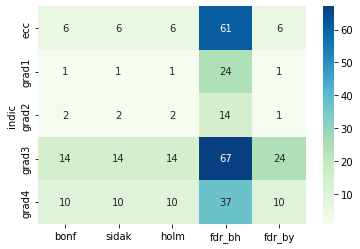

In [172]:
sns.heatmap(data=d2.groupby('indic').sum(),
cmap="GnBu", annot=True)